# LAB 7 : Image Classification using Convolutional Neural Networks 

Name : Girish Kumar Gupta

Roll Number : 211022002
  

#**Problem 1** : Demonstrate Image Classification using CNNs on MNIST Fashion Dataset 

Steps : 

1. Download the MNIST fashion dataset (Available on Kaggle), there are 60,000 examples in the training set spanning all the 10 classes, Take a subset of this (around 1000 examples from each class) and make sure to have a balanced dataset, follow the same procedure for the test set (Maintain a 90:10 split between Train and Test set). Create a proper analysis table of the dataset using histogram plots.

2. Design a convolutional neural network using appropriate layers (Feel free to experiment around this) using any of the Frameworks (Keras/Pytorch/Tensorflow).

3. Consider suitable evaluation metrics and use plots as well as confusion matrix to highlight the accuracy, precision, recall and F1 score on both train and test set.

4. If you observe degradation in test accuracy make suitable changes to the network to encounter the problem.

**Note** : 
  1. There are no restrications on the usage Libraries as well as Frameworks.
  
  2. In this Lab, the emphasis will be more on your presentation rather than the solution, so make sure to include appropriate plots and tables to highlight your observations.

  3. You can also perform the experiment on a different dataset of Image classification as well but make sure to use balanced data.

##Write down the Objectives, Hypothesis and Experimental description for the above problem


## Programming : 
  Please write a program to demonstrate the same

In [ ]:
!pip install tensorflow_gpu

     |████████████████████████████████| 497.5 MB 23 kB/s 
     |████████████████████████████████| 462 kB 59.5 MB/s 


In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from tensorflow.keras.utils import plot_model
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
IMG_ROWS = 28
IMG_COLS = 28
NUM_CLASSES = 10
TEST_SIZE = 0.1
RANDOM_STATE = 2018
#Model
NO_EPOCHS = 50
BATCH_SIZE = 128

# <a id="3">Read the data</a>

There are 10 different classes of images, as following: 

* **0**: **T-shirt/top**;   
* **1**: **Trouser**;   
* **2**: **Pullover**;   
* **3**: **Dress**;
* **4**: **Coat**;
* **5**: **Sandal**;
* **6**: **Shirt**;
* **7**: **Sneaker**;
* **8**: **Bag**;
* **9**: **Ankle boot**.

Image dimmensions are **28**x**28**.   

The train set and test set are given in two separate datasets.

In [ ]:
train_data = pd.read_csv('/content/drive/MyDrive/trialdata/fashion-mnist_train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/trialdata/fashion-mnist_test.csv')

The dimmension of the original  train,  test set are as following:

In [ ]:
print("Fashion MNIST train -  rows:",train_data.shape[0]," columns:", train_data.shape[1])
print("Fashion MNIST test -  rows:",test_data.shape[0]," columns:", test_data.shape[1])

Fashion MNIST train -  rows: 60000  columns: 785
Fashion MNIST test -  rows: 10000  columns: 785


# <a id="3">Sample the data</a>

There are 60000 training data and 10000 test data. We are taking 900 data from each class for training (from training set) and 100 data from each class for testing (from test set) purpose (this will maintain 90:10 ratio).

In [ ]:
test = []
for label in np.unique(test_data['label']):
  idx=np.asarray(np.where(test_data['label']==label))
  # print(idx.shape)
  for i in range(100):
    # print(idx[0,i])
    test.append(test_data.iloc[idx[0,i]])


print(np.shape(test))

(1000, 785)


In [ ]:
training = []
for label in np.unique(train_data['label']):
  idx=np.asarray(np.where(train_data['label']==label))
  # print(idx.shape)
  for i in range(900):
    # print(idx[0,i])
    training.append(train_data.iloc[idx[0,i]])


print(np.shape(training))

(9000, 785)


In [ ]:
np.random.shuffle(training)
train_data = pd.DataFrame(training)

train_data

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
2783,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3121,4,0,0,0,0,0,0,0,0,0,...,4,0,67,254,66,0,0,0,0,0
5048,1,0,0,0,0,0,0,0,0,0,...,198,193,173,0,0,0,0,0,0,0
4379,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,126,82,27,0,0,0
6443,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8433,3,0,0,0,0,0,0,0,0,0,...,120,44,0,0,1,0,0,0,0,0
1899,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3038,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5946,0,0,0,0,0,0,1,0,0,0,...,163,141,109,9,0,3,0,0,0,0


In [ ]:
np.random.shuffle(test)
test_data = pd.DataFrame(test)
test_data

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
527,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
524,4,0,0,0,0,1,0,1,2,0,...,0,1,0,9,71,40,23,0,0,0
731,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
140,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
608,0,0,0,0,0,3,1,0,0,0,...,181,158,27,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,2,0,0,0,0,0,0,0,0,1,...,0,0,0,156,165,59,0,0,0,0
861,2,0,0,0,1,0,1,0,0,0,...,147,131,185,48,39,203,184,112,0,0
317,0,0,0,0,0,0,0,0,0,0,...,119,103,90,1,0,2,0,0,0,0
235,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## <a id="41">Class distribution</a>

Let's see how many number of images are in each class. We start with the train set.

### Train set images class distribution

In [ ]:
labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

def get_classes_distribution(data):
    # Get the count for each label
    label_counts = data["label"].value_counts()

    # Get total number of samples
    total_samples = len(data)


    # Count the number of items in each class
    for i in range(len(label_counts)):
        label = labels[label_counts.index[i]]
        count = label_counts.values[i]
        percent = (count / total_samples) * 100
        print("{:<20s}:   {} or {}%".format(label, count, percent))

get_classes_distribution(train_data)

Sandal              :   900 or 10.0%
Coat                :   900 or 10.0%
Trouser             :   900 or 10.0%
Pullover            :   900 or 10.0%
Bag                 :   900 or 10.0%
Dress               :   900 or 10.0%
Sneaker             :   900 or 10.0%
T-shirt/top         :   900 or 10.0%
Shirt               :   900 or 10.0%
Ankle Boot          :   900 or 10.0%


The classes are equaly distributed in the train set (10% each).

The plot for class distribution is as :

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



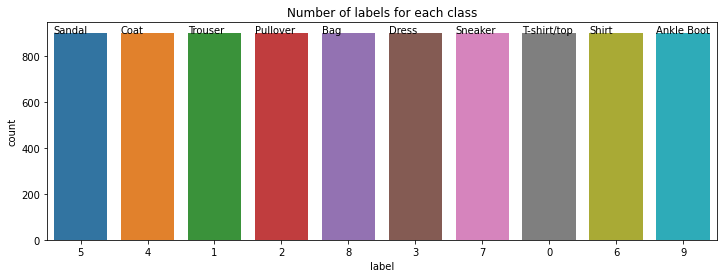

In [ ]:
def plot_label_per_class(data):
    f, ax = plt.subplots(1,1, figsize=(12,4))
    g = sns.countplot(data.label, order = data["label"].value_counts().index)
    g.set_title("Number of labels for each class")

    for p, label in zip(g.patches, data["label"].value_counts().index):
        g.annotate(labels[label], (p.get_x(), p.get_height()+0.1))
    plt.show()  
    
plot_label_per_class(train_data)

### Test set images class distribution

In [ ]:
get_classes_distribution(test_data)

Sandal              :   100 or 10.0%
Coat                :   100 or 10.0%
Sneaker             :   100 or 10.0%
Dress               :   100 or 10.0%
T-shirt/top         :   100 or 10.0%
Ankle Boot          :   100 or 10.0%
Shirt               :   100 or 10.0%
Pullover            :   100 or 10.0%
Bag                 :   100 or 10.0%
Trouser             :   100 or 10.0%


Also in the test set the 10 classes are equaly distributed (10% each).

Lets' also plot the class distribution.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



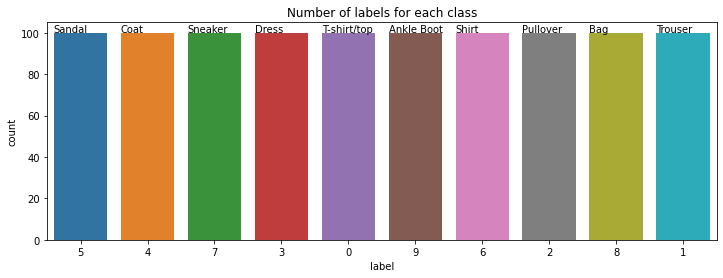

In [ ]:
plot_label_per_class(test_data)

## <a id="42">Sample images</a>

### Train set images

Some samples for the images.   
We add labels to the train set images, with the corresponding fashion item category.  

In [ ]:
def sample_images_data(data):
    # An empty list to collect some samples
    sample_images = []
    sample_labels = []

    # Iterate over the keys of the labels dictionary defined in the above cell
    for k in labels.keys():
        # Get four samples for each category
        samples = data[data["label"] == k].head(4)
        # Append the samples to the samples list
        for j, s in enumerate(samples.values):
            # First column contain labels, hence index should start from 1
            img = np.array(samples.iloc[j, 1:]).reshape(IMG_ROWS,IMG_COLS)
            sample_images.append(img)
            sample_labels.append(samples.iloc[j, 0])

    print("Total number of sample images to plot: ", len(sample_images))
    return sample_images, sample_labels

train_sample_images, train_sample_labels = sample_images_data(train_data)

Total number of sample images to plot:  40


Let's now plot the images.   
The labels are shown above each image.

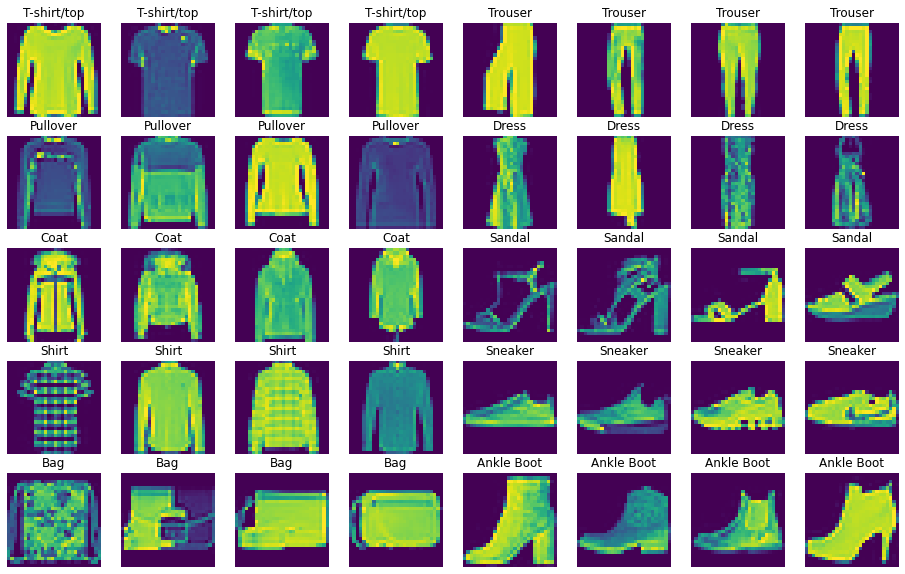

In [ ]:
def plot_sample_images(data_sample_images,data_sample_labels):
    # Plot the sample images now
    f, ax = plt.subplots(5,8, figsize=(16,10))

    for i, img in enumerate(data_sample_images):
        ax[i//8, i%8].imshow(img)
        ax[i//8, i%8].axis('off')
        ax[i//8, i%8].set_title(labels[data_sample_labels[i]])
    plt.show()    
    
plot_sample_images(train_sample_images,train_sample_labels)

### Test set images

Let's plot now a selection of the test set images.  
Labels are as well added (they are known).

Total number of sample images to plot:  40


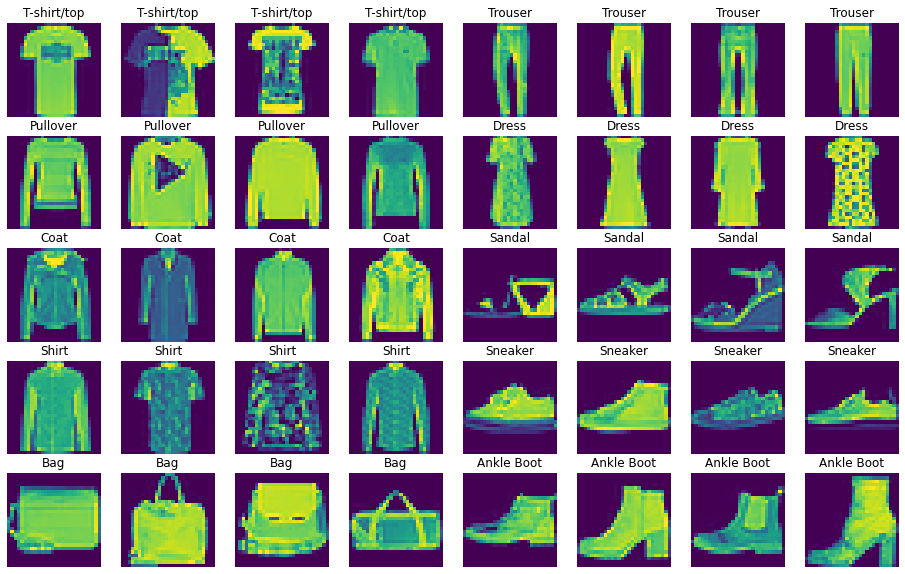

In [ ]:
test_sample_images, test_sample_labels = sample_images_data(test_data)
plot_sample_images(test_sample_images,test_sample_labels)

# <a id="5">Model</a>

We start with preparing the model.

## <a id="51">Prepare the model</a>

## Data preprocessing

First we will do a data preprocessing to prepare for the model.

We reshape the columns  from (784) to (28,28,1). We also save label (target) feature as a separate vector.

In [ ]:
# data preprocessing
def data_preprocessing(raw):
    out_y = tf.keras.utils.to_categorical(raw.label, NUM_CLASSES)
    num_images = raw.shape[0]
    x_as_array = raw.values[:,1:]
    x_shaped_array = x_as_array.reshape(num_images, IMG_ROWS, IMG_COLS, 1)
    out_x = x_shaped_array / 255
    return out_x, out_y

We process both the train_data and the test_data

---

In [ ]:
# prepare the data
X, y = data_preprocessing(train_data)
X_test, y_test = data_preprocessing(test_data)

## Split train in train and validation set

We further split the train set in train and validation set. The validation set will be 20% from the original train set, therefore the split will be train/validation of 0.8/0.2.

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

The dimmension of the processed train, validation and test set are as following:

In [ ]:
print("Fashion MNIST train -  rows:",X_train.shape[0]," columns:", X_train.shape[1:4])
print("Fashion MNIST valid -  rows:",X_val.shape[0]," columns:", X_val.shape[1:4])
print("Fashion MNIST test -  rows:",X_test.shape[0]," columns:", X_test.shape[1:4])

Fashion MNIST train -  rows: 8100  columns: (28, 28, 1)
Fashion MNIST valid -  rows: 900  columns: (28, 28, 1)
Fashion MNIST test -  rows: 1000  columns: (28, 28, 1)


Let's check the class inbalance for the resulted training set.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



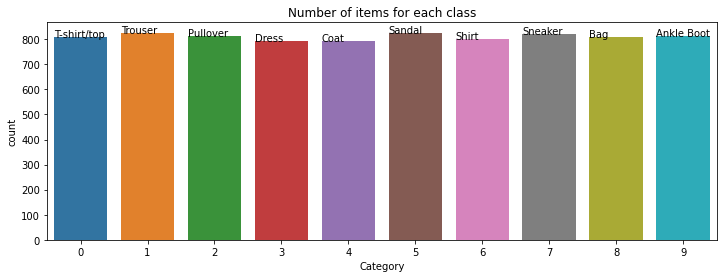

Sandal              :   826 or 10.19753086419753%
Trouser             :   826 or 10.19753086419753%
Sneaker             :   820 or 10.123456790123457%
Ankle Boot          :   814 or 10.049382716049383%
Pullover            :   813 or 10.037037037037038%
T-shirt/top         :   809 or 9.987654320987655%
Bag                 :   807 or 9.962962962962962%
Shirt               :   800 or 9.876543209876543%
Dress               :   794 or 9.802469135802468%
Coat                :   791 or 9.765432098765432%


In [ ]:
def plot_count_per_class(yd):
    ydf = pd.DataFrame(yd)
    f, ax = plt.subplots(1,1, figsize=(12,4))
    g = sns.countplot(ydf[0], order = np.arange(0,10))
    g.set_title("Number of items for each class")
    g.set_xlabel("Category")
    
    for p, label in zip(g.patches, np.arange(0,10)):
        g.annotate(labels[label], (p.get_x(), p.get_height()+0.1))
        
    plt.show()  

def get_count_per_class(yd):
    ydf = pd.DataFrame(yd)
    # Get the count for each label
    label_counts = ydf[0].value_counts()

    # Get total number of samples
    total_samples = len(yd)


    # Count the number of items in each class
    for i in range(len(label_counts)):
        label = labels[label_counts.index[i]]
        count = label_counts.values[i]
        percent = (count / total_samples) * 100
        print("{:<20s}:   {} or {}%".format(label, count, percent))
    
plot_count_per_class(np.argmax(y_train,axis=1))
get_count_per_class(np.argmax(y_train,axis=1))

## <a id="52">Train the model</a>

### Build the model   



We will use a **Sequential** model.
* The **Sequential** model is a linear stack of layers. It can be first initialized and then we add layers using **add** method or we can add all layers at init stage. The layers added are as follows:

* **Conv2D** is a 2D Convolutional layer (i.e. spatial convolution over images). The parameters used are:
 * filters - the number of filters (Kernels) used with this layer; here filters = 32;
 * kernel_size - the dimmension of the Kernel: (3 x 3);
 * activation - is the activation function used, in this case `relu`;
 * kernel_initializer - the function used for initializing the kernel;
 * input_shape - is the shape of the image presented to the CNN: in our case is 28 x 28
 The input and output of the **Conv2D** is a 4D tensor.
 
* **MaxPooling2D** is a Max pooling operation for spatial data. Parameters used here are:
 * *pool_size*, in this case (2,2), representing the factors by which to downscale in both directions;
 
 * **Conv2D** with the following parameters:
 * filters: 64;
 * kernel_size : (3 x 3);
 * activation : `relu`;
 
* **MaxPooling2D** with parameter:
 * *pool_size* : (2,2);

* **Conv2D** with the following parameters:
 * filters: 128;
 * kernel_size : (3 x 3);
 * activation : `relu`;
 
* **Flatten**. This layer Flattens the input. Does not affect the batch size. It is used without parameters;

* **Dense**. This layer is a regular fully-connected NN layer. It is used without parameters;
 * units - this is a positive integer, with the meaning: dimensionality of the output space; in this case is: 128;
 * activation - activation function : `relu`;
 
* **Dense**. This is the final layer (fully connected). It is used with the parameters:
 * units: the number of classes (in our case 10);
 * activation : `softmax`; for this final layer it is used `softmax` activation (standard for multiclass classification)
 

Then we compile the model, specifying as well the following parameters:
* *loss*;
* *optimizer*;
* *metrics*. 

In [ ]:
# Model
model = Sequential()
# Add convolution 2D
model.add(Conv2D(64, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=(IMG_ROWS, IMG_COLS, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, 
                 kernel_size=(3, 3), 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(324, activation='relu'))
model.add(Dense(NUM_CLASSES, activation='softmax'))


model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

### Inspect the model

Let's check the model we initialized.

In [ ]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 5, 5, 128)         0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 3, 3, 256)         295168    
_________________________________________________________________
flatten_12 (Flatten)         (None, 2304)              0         
_________________________________________________________________
dense_24 (Dense)             (None, 324)             

### Run the model

We run the model with the training set. We are also using the validation set (a subset from the orginal training set) for validation.

In [ ]:
train_model = model.fit(X_train, y_train,
                  batch_size=BATCH_SIZE,
                  epochs=NO_EPOCHS,
                  verbose=1,
                  validation_data=(X_val, y_val))

Epoch 1/50
64/64 [==============================] - 30s 458ms/step - loss: 0.7986 - accuracy: 0.7077 - val_loss: 0.5845 - val_accuracy: 0.7967
Epoch 2/50
64/64 [==============================] - 22s 342ms/step - loss: 0.4638 - accuracy: 0.8269 - val_loss: 0.4961 - val_accuracy: 0.8300
Epoch 3/50
64/64 [==============================] - 22s 343ms/step - loss: 0.3893 - accuracy: 0.8600 - val_loss: 0.4580 - val_accuracy: 0.8478
Epoch 4/50
64/64 [==============================] - 23s 362ms/step - loss: 0.3371 - accuracy: 0.8773 - val_loss: 0.4318 - val_accuracy: 0.8489
Epoch 5/50
64/64 [==============================] - 22s 343ms/step - loss: 0.3030 - accuracy: 0.8838 - val_loss: 0.4530 - val_accuracy: 0.8422
Epoch 6/50
64/64 [==============================] - 23s 359ms/step - loss: 0.2550 - accuracy: 0.9051 - val_loss: 0.4159 - val_accuracy: 0.8622
Epoch 7/50
64/64 [==============================] - 22s 342ms/step - loss: 0.2308 - accuracy: 0.9158 - val_loss: 0.4247 - val_accuracy: 0.8567

## <a id="53">Test prediction accuracy</a>

We calculate the test loss and accuracy.

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.880325973033905
Test accuracy: 0.8920000195503235


## <a id="53">Validation accuracy and loss</a>

Let's plot the train and validation accuracy and loss, from the train history.

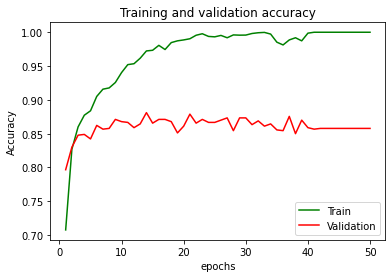

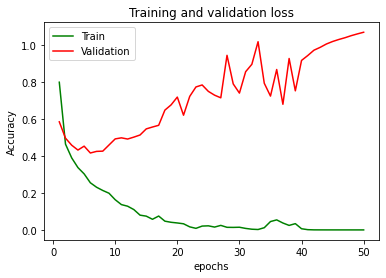

In [ ]:

def plot_accuracy_and_loss(train_model):
    hist = train_model.history
    acc = hist['accuracy']
    val_acc = hist['val_accuracy']
    loss = hist['loss']
    val_loss = hist['val_loss']
    epochs = list(range(1,len(acc)+1))

    
    plt.plot(epochs,acc, c="Green", label='Train')
    plt.plot(epochs,val_acc, c="red", label='Validation')
    plt.xlabel('epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.show()

    
    plt.plot(epochs,loss, c="Green", label='Train')
    plt.plot(epochs,val_loss, c="red", label='Validation')
    plt.xlabel('epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and validation loss')
    plt.legend()
    
    plt.show()

plot_accuracy_and_loss(train_model)

The validation accuracy does not improve after few epochs and the validation loss is increasing after few epochs. This confirms our assumption that the model is overfitted. We will try to improve the model by adding Dropout layers.

## <a id="55">Add Dropout layers to the model</a>

We add several Dropout layers to the model, to help avoiding overfitting.    
Dropout is helping avoid overfitting.

In [ ]:
# Model
model = Sequential()
# Add convolution 2D
model.add(Conv2D(64, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=(IMG_ROWS, IMG_COLS, 1)))
model.add(MaxPooling2D((2, 2)))
# Add dropouts to the model
model.add(Dropout(0.5))
model.add(Conv2D(128, 
                 kernel_size=(3, 3), 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Add dropouts to the model
model.add(Dropout(0.5))
model.add(Conv2D(256, (3, 3), activation='relu'))
# Add dropouts to the model
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(324, activation='relu'))
# Add dropouts to the model
model.add(Dropout(0.5))
model.add(Dense(NUM_CLASSES, activation='softmax'))


model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

## <a id="56">Re-train the model</a>

Let's inspect first the model.

In [ ]:
model.summary()
train_model = model.fit(X_train, y_train,
                  batch_size=BATCH_SIZE,
                  epochs=NO_EPOCHS,
                  verbose=1,
                  validation_data=(X_val, y_val))

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_43 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
dropout_28 (Dropout)         (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 5, 5, 128)         0         
_________________________________________________________________
dropout_29 (Dropout)         (None, 5, 5, 128)         0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 3, 3, 256)       

## <a id="57">Prediction accuracy with the new model</a>

Let's re-evaluate the prediction accuracy with the new model.

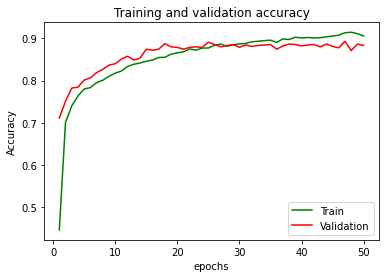

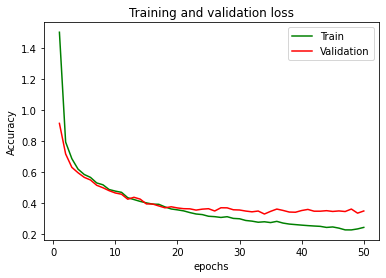

In [ ]:
plot_accuracy_and_loss(train_model)

After adding the Dropout layers, the validation accuracy and validation loss are much better. Let's check now the prediction for the test set.


## <a id="58">Prediction accuracy with the new model</a>

Let's re-evaluate the test prediction accuracy with the new model.

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.27910104393959045
Test accuracy: 0.902999997138977


Also the test accuracy improved.

In [ ]:
#get the predictions for the test data
predicted_classes = model.predict(X_test)
#get the indices to be plotted
y_true = test_data.iloc[:, 0]

In [ ]:
p= np.argmax(predicted_classes,axis=1)

In [ ]:
# p

In [ ]:
y = np.asarray(y_true)
# y

In [ ]:

correct = np.nonzero(p==y)[0]
incorrect = np.nonzero(p!=y)[0]

In [ ]:
print("Correct predicted classes:",correct.shape[0])
print("Incorrect predicted classes:",incorrect.shape[0])

Correct predicted classes: 883
Incorrect predicted classes: 117


## <a id="58">Classification report</a>

In [ ]:
target_names = ["Class {} ({}) :".format(i,labels[i]) for i in range(NUM_CLASSES)]
print(classification_report(y, p, target_names=target_names))

                         precision    recall  f1-score   support

Class 0 (T-shirt/top) :       0.85      0.82      0.84       100
    Class 1 (Trouser) :       1.00      0.97      0.98       100
   Class 2 (Pullover) :       0.86      0.73      0.79       100
      Class 3 (Dress) :       0.90      0.94      0.92       100
       Class 4 (Coat) :       0.75      0.82      0.78       100
     Class 5 (Sandal) :       0.99      0.94      0.96       100
      Class 6 (Shirt) :       0.67      0.71      0.69       100
    Class 7 (Sneaker) :       0.92      0.98      0.95       100
        Class 8 (Bag) :       0.97      0.96      0.96       100
 Class 9 (Ankle Boot) :       0.95      0.96      0.96       100

               accuracy                           0.88      1000
              macro avg       0.89      0.88      0.88      1000
           weighted avg       0.89      0.88      0.88      1000



## <a id="58">Confusion matrix</a>

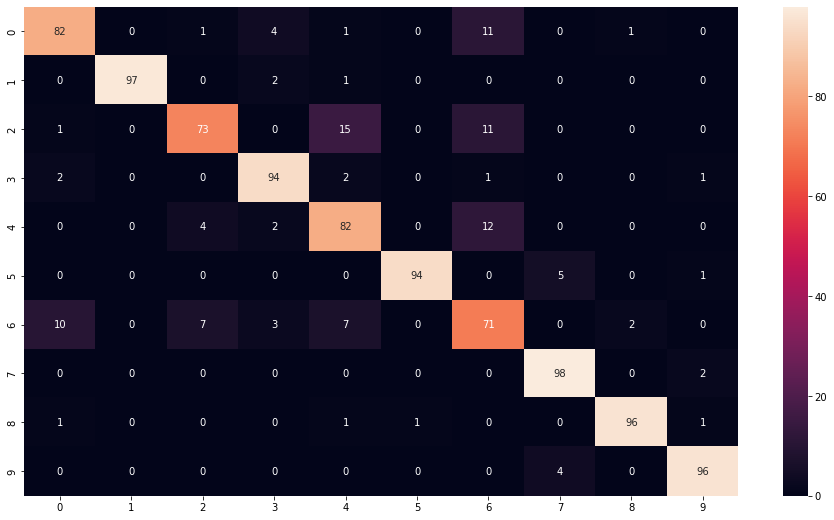

In [ ]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize = (16,9))
cm = confusion_matrix(y,p)
sns.heatmap(cm , annot = True,fmt = 'd',xticklabels = labels,yticklabels = labels)

  

Let's also inspect some of the images. We created two subsets of the predicted images set, correctly and incorrectly classified.

# <a id="6">Visualize classified images</a>

## <a id="61">Correctly classified images</a>


We visualize few images correctly classified.

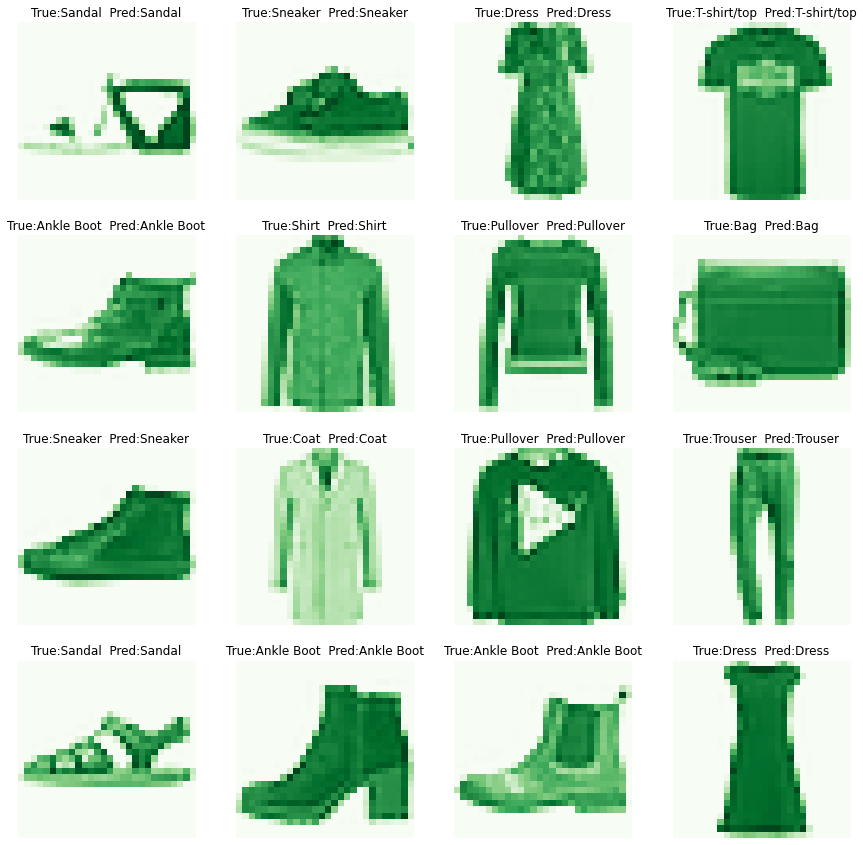

In [ ]:
def plot_images(data_index,cmap="Blues"):
    # Plot the sample images now
    f, ax = plt.subplots(4,4, figsize=(15,15))

    for i, indx in enumerate(data_index[:16]):
        ax[i//4, i%4].imshow(X_test[indx].reshape(IMG_ROWS,IMG_COLS), cmap=cmap)
        ax[i//4, i%4].axis('off')
        ax[i//4, i%4].set_title("True:{}  Pred:{}".format(labels[y[indx]],labels[p[indx]]))
    plt.show()    
    
plot_images(correct, "Greens")

## <a id="62">Incorrectly classified images</a>

Let's see also few images incorrectly classified.

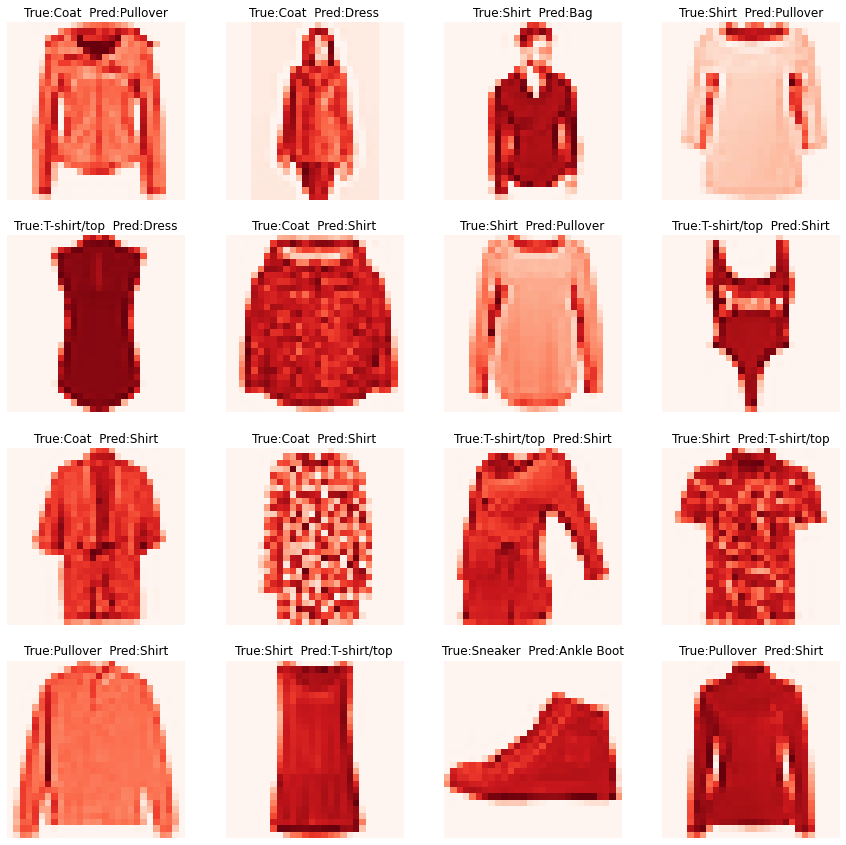

In [ ]:
plot_images(incorrect, "Reds")

## Inferences and Conclusion : State all the key observations and conclusion

# <a id="7">Conclusions</a>

With a complex sequential model with multiple convolution layers and 50 epochs for the training, we obtained an accuracy ~0.88 for test prediction.
After investigating the validation accuracy and loss, we understood that the model is overfitting. 

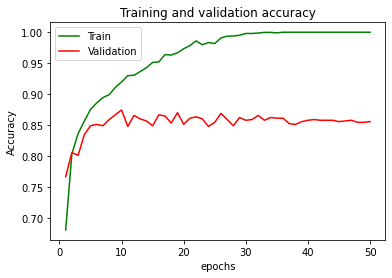
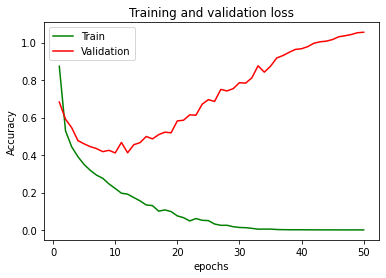




We retrained the model with Dropout layers (0.1 as dropout probability) to the model to reduce overfitting.  
We confirmed the model improvement and with the same number of epochs for the training we obtained with the new model an accuracy of ~0.89 for test prediction. Only few classes are not correctly classified all the time, especially Class 6 (Shirt).

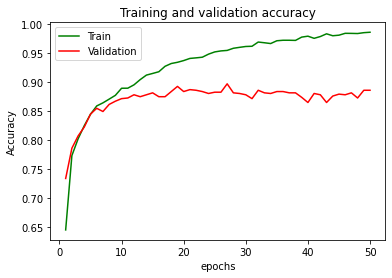
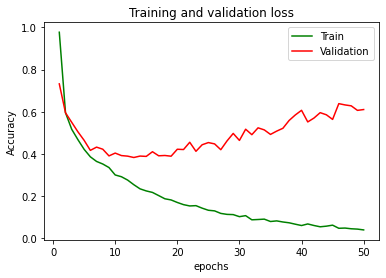



We retrained the model with Dropout layers (0.5 as dropout probability) to the model to reduce overfitting.  
We confirmed the model improvement and with the same number of epochs for the training we obtained with the new model an accuracy of ~0.88 for test prediction. Only few classes are not correctly classified all the time, especially Class 6 (Shirt).

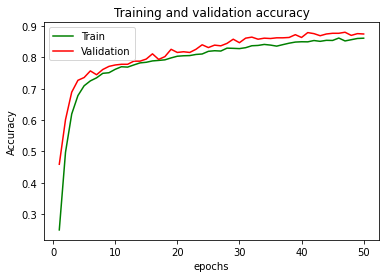
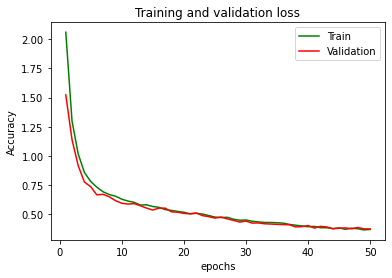